# [실습] 효율적 투자 전략
* 대상 종목 : 주식, 채권
* 목표: 주식과 채권을 몇대몇으로 담아야 가장 효율적으로 수익을 낼 수 있는지

In [ ]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pykrx import stock
from pykrx import bond

import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



## Data Load

In [ ]:
sdf = pd.read_csv("./datasets/kodex_stock.csv")
sdf = sdf.set_index("dt")
sdf = sdf.drop(['high', 'low', 'open','volume'], axis=1)


bdf = pd.read_csv("./datasets/kodex_bond10y.csv")
bdf = bdf.set_index("dt")
bdf = bdf.drop(['high', 'low', 'open','volume'], axis=1)

In [ ]:
sdf.shape, bdf.shape

((1845, 1), (1845, 1))

In [ ]:
sdf.head()

,close
dt,
2012-01-20,49960.0
2012-01-25,49960.0
2012-01-26,49930.0
2012-01-27,50000.0
2012-01-30,50130.0


In [ ]:
bdf.head()

,close
dt,
2012-01-20,23197.4
2012-01-25,23277.4
2012-01-26,23299.6
2012-01-27,23335.2
2012-01-30,23073.0


In [ ]:
ret_df = pd.concat([sdf, bdf], axis=1)
ret_df.columns = ['stock','bond']
ret_df

,stock,bond
dt,,
2012-01-20,49960.0,23197.4
2012-01-25,49960.0,23277.4
2012-01-26,49930.0,23299.6
2012-01-27,50000.0,23335.2
2012-01-30,50130.0,23073.0
...,...,...
2019-07-17,71210.0,27225.0
2019-07-18,71665.0,27165.0
2019-07-19,71770.0,27545.0


In [ ]:
daily_ret = ret_df.pct_change() 
annual_ret = daily_ret.mean() * 252
daily_cov = daily_ret.cov() 
annual_cov = daily_cov * 252

port_ret = [] 
port_risk = [] 
port_weights = [] 

stocks = ret_df.columns

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights /= np.sum(weights) 

    수익 = np.dot(weights, annual_ret) 
    위험율 = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 

    port_ret.append(수익) 
    port_risk.append(위험율) 
    port_weights.append(weights) 

portfolio = {'수익': port_ret, '위험율': port_risk} 
for i, s in enumerate(stocks): 
    portfolio[s] = [weight[i] for weight in port_weights] 
ret_df = pd.DataFrame(portfolio) 
ret_df = ret_df[['수익', '위험율'] + [s for s in stocks]] 
ret_df

,수익,위험율,stock,bond
0,0.040742,0.069372,0.466077,0.533923
1,0.042304,0.059695,0.553389,0.446611
2,0.035866,0.103290,0.193370,0.806630
3,0.043540,0.052820,0.622528,0.377472
4,0.037997,0.088009,0.312528,0.687472
...,...,...,...,...
19995,0.045677,0.043609,0.742041,0.257959
19996,0.037552,0.091153,0.287667,0.712333
19997,0.035676,0.104677,0.182733,0.817267
19998,0.041566,0.064154,0.512146,0.487854


In [ ]:
ret_df['샤프'] = ret_df['수익']  / ret_df['위험율']
ret_df

,수익,위험율,stock,bond,샤프
0,0.040742,0.069372,0.466077,0.533923,0.587299
1,0.042304,0.059695,0.553389,0.446611,0.708656
2,0.035866,0.103290,0.193370,0.806630,0.347238
3,0.043540,0.052820,0.622528,0.377472,0.824306
4,0.037997,0.088009,0.312528,0.687472,0.431738
...,...,...,...,...,...
19995,0.045677,0.043609,0.742041,0.257959,1.047425
19996,0.037552,0.091153,0.287667,0.712333,0.411971
19997,0.035676,0.104677,0.182733,0.817267,0.340820
19998,0.041566,0.064154,0.512146,0.487854,0.647915


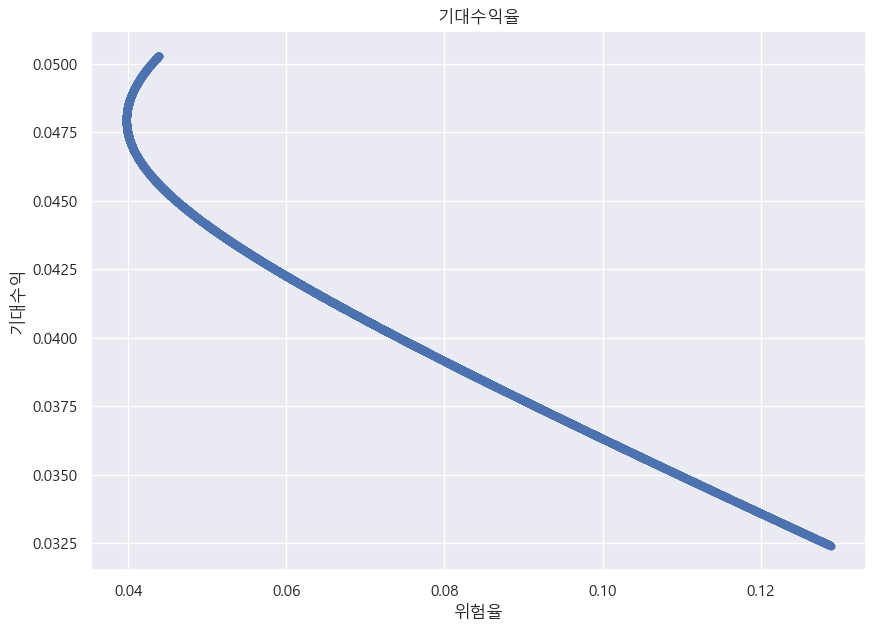

In [ ]:
ret_df.plot.scatter(x='위험율', y='수익', figsize=(10, 7))

plt.title('기대수익율') 
plt.xlabel('위험율') 
plt.ylabel('기대수익')
plt.plot( )
plt.show() 

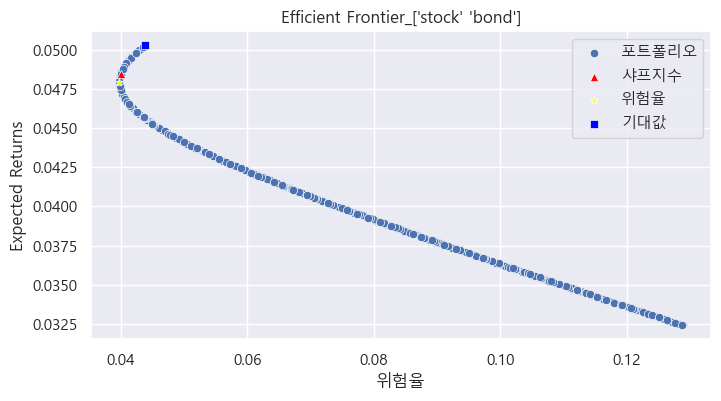

In [ ]:
# 샤프치수   최대 포트
sharp_max = ret_df[ret_df['샤프'] == ret_df['샤프'].max()]
# 위험리스크 최소 포트
risk_min  = ret_df[ret_df['위험율'] == ret_df['위험율'].min()] 
# 수익률     최대 포트
return_max = ret_df[ret_df['수익'] == ret_df['수익'].max()] 

plt.figure(figsize=(8,4))
sns.scatterplot(data=ret_df    , x='위험율', y='수익'                     , label    =f"포트폴리오")
sns.scatterplot(data=sharp_max , x='위험율', y='수익', marker="^", c='red', label    =f"샤프지수")
sns.scatterplot(data=risk_min  , x='위험율', y='수익', marker="*", c='yellow', label =f"위험율")
sns.scatterplot(data=return_max, x='위험율', y='수익', marker="s", c='blue', label   =f"기대값")

plt.title(f'Efficient Frontier_{stocks.values}') 
plt.xlabel('위험율') 
plt.ylabel('Expected Returns') 
plt.show() 